# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Moch. Ichwan Alif Kurniawan
- **Email:** Ichwanalif55@gmail.com
- **ID Dicoding:** mc378d5y1720

## Menentukan Pertanyaan Bisnis

- Bagaimana performa rental dalam 2 tahun tearkhir
- Kapan Musim peminjaman tertinggi dan terendah
- berapa total jumlah peminjaman setiap harinya
- Berapa persen total user umum dan ter-registrasi
- berapa rata-rata waktu peminjaman di hari libur (bukan weekend)

## Import Semua Packages/Library yang Digunakan

In [11]:
# prompt: import pandas, import numpy, import scipy, import matplotlib, import seaborn, import stremlit

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

## Data Wrangling

### Gathering Data

In [10]:
Day_df=pd.read_csv("data/day.csv",delimiter=',')
Hour_df=pd.read_csv("data/hour.csv", delimiter=',')
Hour_df.head(10)


NameError: name 'pd' is not defined

**Insight:**
- Table Day menampung data sebanyak 732 hari
- Table Hour menampung data sebanyak 17380 jam

### Assessing Data

### Deskrpsi dari table

In [ ]:
# Deskripsi dari day_df
Day_df.describe()
# Deskripsi dari hour_df
Hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### mencari missing value dan Duplikasi

In [ ]:
# mencari missing value
Day_df.isnull().sum()
Hour_df.isnull().sum()
# mengecek Duplikasi
Day_df.duplicated().sum()
Hour_df.duplicated().sum()

0

#### melihat type data dari dataset

In [ ]:
# mencari informasi dari dataset hour.csv
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tidak Terdapat missing value di table Day, dan table Hour
- Tidak terdapat baris yang sama di kedua table
- kolom dteday harusnya mengunakan type date

### Cleaning Data

In [ ]:
# todo - merubah type data column dteday menjadi datetime
dateColumn = ["dteday"]
for column in dateColumn:
    Day_df[column] = pd.to_datetime(Day_df[column])
    Hour_df[column] = pd.to_datetime(Hour_df[column])


**Insight:**
- Merubah type data dteday menjadi datetime di kedua tabel

## Exploratory Data Analysis (EDA)

### Explore Data Day_df

#### mencari tahu total penjualan dari tahun 2011 dan 2012

In [ ]:
performa_tahunan=Day_df.groupby("yr")["cnt"].sum()
totalPenjualan_2011=performa_tahunan[0]
totalPenjualan_2012=performa_tahunan[1]
print (f"Total penjualan di tahun 2011 = {totalPenjualan_2011}")
print (f"Total penjualan di tahun 2012 = {totalPenjualan_2012}")

Total penjualan di tahun 2011 = 1243103
Total penjualan di tahun 2012 = 2049576


#### Mencaritahu total setiap musimnya

In [ ]:
# mengelompokkan penjualan setiap musimnya
musim_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
Day_df["season_label"] = Day_df["season"].map(musim_labels)
musim_rental = Day_df.groupby("season_label")["cnt"].mean()
musim_total = Day_df.groupby("season_label")["cnt"].sum()

# Simpan total peminjaman per musim dalam variabel
total_peminjaman_musim = musim_total.to_dict()
rata_rata_peminjaman_musim = musim_rental.to_dict()

# Tampilkan dalam bentuk tabel
tabel_musim = pd.DataFrame({
    "Total Peminjaman": total_peminjaman_musim,
    "Rata-rata Peminjaman": rata_rata_peminjaman_musim
})
print(tabel_musim)

        Total Peminjaman  Rata-rata Peminjaman
Fall             1061129           5644.303191
Spring            471348           2604.132597
Summer            918589           4992.331522
Winter            841613           4728.162921


#### Mencaritahu total setiap harinya

In [ ]:
# menghitung total peminjaman dalam setiap hari
totalHarian = Day_df.groupby("weekday")["cnt"].sum()
totalHoliday = Day_df.groupby("holiday")["cnt"].sum()
# simpan dalam bentuk string
hari_dict = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}
# mapping harian
totalHarian.index = totalHarian.index.map(hari_dict)
# simpan dalam bentuk variabel
totalPeminjamanHarian = totalHarian.to_dict()
# Tampilkan dalam bentuk tabel
tabelHarian = pd.DataFrame({
    "Hari": totalPeminjamanHarian.keys(),
    "Total Peminjaman Harian": totalPeminjamanHarian.values()
})
print (tabelHarian)
# Cari total peminjaman terbanyak
totalPeminjamanTerbanyak = max(totalPeminjamanHarian.values())
totalPeminjamanTersedikit = min(totalPeminjamanHarian.values())
hari_terbanyak = [kunci for kunci, nilai in totalPeminjamanHarian.items() if nilai == totalPeminjamanTerbanyak]
hari_tersedikit = [kunci for kunci, nilai in totalPeminjamanHarian.items() if nilai == totalPeminjamanTersedikit]

print(f"Total peminjaman terbanyak = {totalPeminjamanTerbanyak} pada hari {hari_terbanyak[0]}")
print(f"Total peminjaman tesedikit = {totalPeminjamanTersedikit} pada hari {hari_tersedikit[0]}")

     Hari  Total Peminjaman Harian
0  Minggu                   444027
1   Senin                   455503
2  Selasa                   469109
3    Rabu                   473048
4   Kamis                   485395
5   Jumat                   487790
6   Sabtu                   477807
Total peminjaman terbanyak = 487790 pada hari Jumat
Total peminjaman tesedikit = 444027 pada hari Minggu


#### Mengeksplorasi persentase jumlah user

In [ ]:
# total jumlah user
totalCasual = Day_df.groupby("casual")["cnt"].sum()
totalRegistered = Day_df.groupby("registered")["cnt"].sum()
# persetase jumlah
persentase_casual = (Day_df["casual"].sum() / Day_df["cnt"].sum()) * 100
persentase_registered = (Day_df["registered"].sum() / Day_df["cnt"].sum()) * 100

print (f"jumlah pelanggan umum adalah = {totalCasual} dengan persentase {persentase_casual}")
print (f"jumlah pelanggan teregistrasi adalah = {totalRegistered} dengan persentase {persentase_registered}")

jumlah pelanggan umum adalah = casual
2         22
9       1124
15       431
25      1162
34       506
        ... 
3155    7836
3160    8714
3252    6857
3283    6591
3410    8294
Name: cnt, Length: 606, dtype: int64 dengan persentase 18.830168382645258
jumlah pelanggan teregistrasi adalah = registered
20        22
416      431
432      441
451      754
472      506
        ... 
6844    7572
6898    7693
6911    7691
6917    8167
6946    7733
Name: cnt, Length: 679, dtype: int64 dengan persentase 81.16983161735475


**Insight:**
- Total penjualan terbanyak, terjadi di tahun 2012
- Peminjaman terbanyak terjadi musim gugur dengan rata-rata perhari 5644.3 per-hari
- Musim dengan peminjaman paling sedikit terdapat di musim semi dengan rata-rata 2604 per-hari
- Total peminjaman terbanyak = 487790 pada hari Jumat
- Total peminjaman tesedikit = 444027 pada hari Minggu
- Jumlah pelanggan didominasi oleh pelanggan yang sudah ter-registrasi yakni 81.2% sisanya merupakan pelanggan umum dengan persentase 18.8%

### Explore Data Hour_df

In [ ]:
libur_non_weekend = Hour_df[(Hour_df["holiday"] == 1) & (Hour_df["workingday"] == 0)]
total_Pemakaian_Holiday = libur_non_weekend.groupby("hr")["cnt"].mean().round(0).astype(int)
print (total_Pemakaian_Holiday)

hr
0      57
1      39
2      25
3      12
4       6
5      11
6      28
7      82
8     171
9     171
10    203
11    249
12    287
13    299
14    286
15    265
16    272
17    293
18    269
19    222
20    178
21    145
22    109
23     58
Name: cnt, dtype: int64


**Insight:**
- Peminjaman terbanyak terjadi di jam 13:00, sebanyak 6269
- Peminjaman terendah terjadi di jam 04:00, senyak 4 buah

## Visualization & Explanatory Analysis

### Pertanyaan 1:

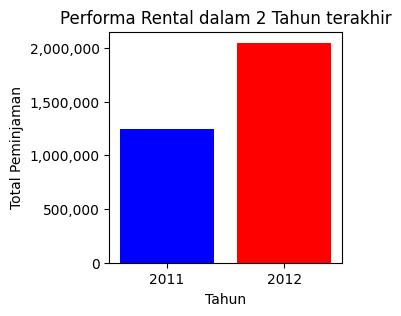

In [ ]:
# 1. Visualisasi Performa Rental dalam 2 Tahun
performa_tahunan = Day_df.groupby("yr")["cnt"].sum().astype(int)
plt.figure(figsize=(3, 3))
plt.bar(["2011", "2012"], performa_tahunan, color=['blue', 'red'])
plt.xlabel("Tahun")
plt.ylabel("Total Peminjaman")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Performa Rental dalam 2 Tahun terakhir")
plt.show()

**Insight:**
- Peminjaman tertinggi terjadi ditahun 2012
- Terjadi peningkatan sebanyak 8 juta unit yang dipinjam dari tahun sebelumnya

### Pertanyaan 2:

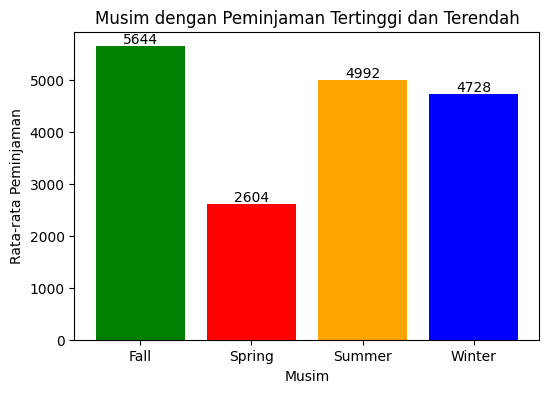

In [ ]:
# 2. Visualisasi Musim Peminjaman Tertinggi dan Terendah
musim_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
Day_df["season_label"] = Day_df["season"].map(musim_labels)
musim_rental = Day_df.groupby("season_label")["cnt"].mean()

plt.figure(figsize=(6, 4))
bars = plt.bar(musim_rental.index, musim_rental, color=['green', 'red', 'orange', 'blue'])
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Musim dengan Peminjaman Tertinggi dan Terendah")
# Menambahkan label pada batang diagram
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
plt.show()

**Insight:**
- Musim peminjaman tertinggi terjadi di Musim Dingin
- Musim peminjaman terendah terjadi di Musim Semi
- Unutk Musim panas ke musim dingin terjadi penurunan sebanyak 264 jumlah peminjaman

### Pertanyaan 3:

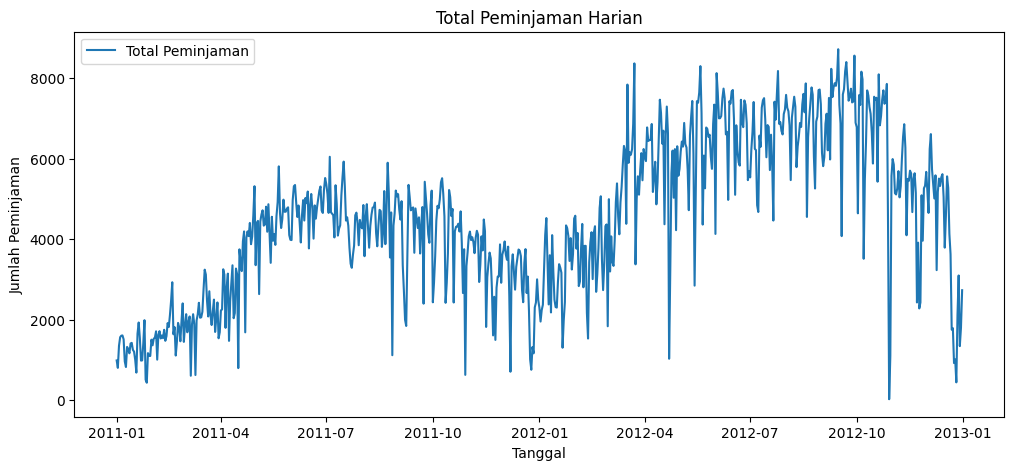

In [ ]:
# 3. Total jumlah peminjaman setiap harinya
plt.figure(figsize=(12, 5))
sns.lineplot(data=Day_df, x="dteday", y="cnt", label="Total Peminjaman")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.title("Total Peminjaman Harian")
plt.show()

**Insight:**

- Terjadi tren kenaikan di bulan Januari sampai Juli 2011
- Penurunan terjadi di paruh kedua 2011
- Januari 2012 sampai bulan Oktober 2012 terjandi kenaikan secara konsisten
- Penurunan jumlah peminjaman terjadi di bulan November sampai akhir Desember

### Pertanyaan 4:

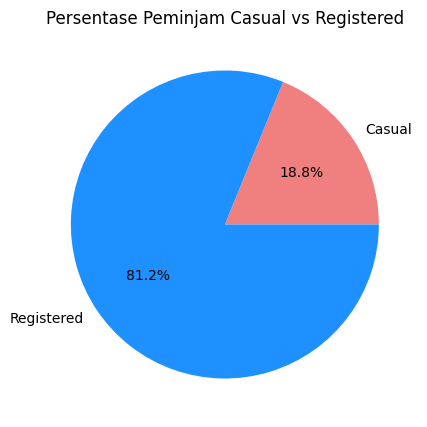

In [ ]:
# 4. Persentase user umum dan ter-registrasi
persentase_casual = (Day_df["casual"].sum() / Day_df["cnt"].sum()) * 100
persentase_registered = (Day_df["registered"].sum() / Day_df["cnt"].sum()) * 100
plt.figure(figsize=(5, 5))
plt.pie([persentase_casual, persentase_registered], labels=["Casual", "Registered"],
        autopct="%1.1f%%", colors=['lightcoral', 'dodgerblue'])
plt.title("Persentase Peminjam Casual vs Registered")
plt.show()

**Insight:**

- Lebih dari 81% penggunan sudah teregistrasi
- Jumlah user casual hanyak mencangkup 18.8% kurang dari seperlima total keseluruhan user

### Pertanyaan 5:

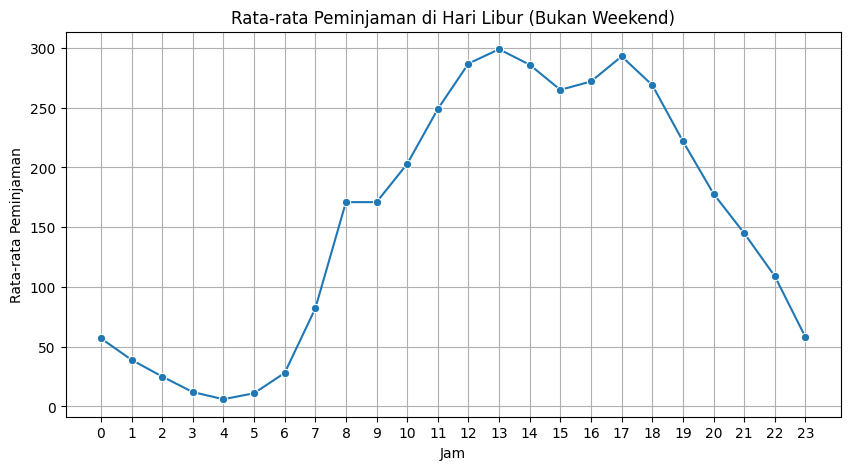

In [ ]:
# 5. Rata-rata waktu peminjaman di hari libur (bukan weekend)
libur_non_weekend = Hour_df[(Hour_df["holiday"] == 1) & (Hour_df["workingday"] == 0)]
rata_rata_libur_non_weekend = libur_non_weekend.groupby("hr")["cnt"].mean().round(0).astype(int)
plt.figure(figsize=(10, 5))
sns.lineplot(x=rata_rata_libur_non_weekend.index, y=rata_rata_libur_non_weekend.values, marker="o")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Rata-rata Peminjaman di Hari Libur (Bukan Weekend)")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**

- Terjadi kenaikan peminjam di jam mulai beraktivitas, mulai dari jam 5 pagi sampai 13 siang
- Penurunan terjadi dari jam 13 siang sampai 15 sore
- Kenaikan tren kembali terjadi dari jam 15 sore sampai 17 sore, yang merupakan jam pulang kantor
- Penurunan treen terus terjadi mulai jam 17 sore, karena orang-orang mulai berada di rumah.  

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2